# From Discrete to Continuous

```{contents}
:local:
```

In [1]:
import sys
from pathlib import Path
parent_dir = str(Path().resolve().parents[2])
sys.path.append(parent_dir)

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import seaborn as sns
from typing import *
%matplotlib inline

from omnivault.utils.reproducibility.seed import seed_all
from omnivault.utils.probability_theory.plot import plot_continuous_pdf_and_cdf
seed_all()

/home/runner/work/omniverse/omniverse/omnivault/utils/reproducibility/seed.py:120: UserWarning: Deterministic mode is activated. This will negatively impact performance and may cause increase in CUDA memory footprint.
  configure_deterministic_mode()


1992

## Calculus

The following content is adapted from
{cite}`continous_random_variables_mit_1805`.

Conceptually, one should know that the two views of a definite integral:

1. The area under the curve given by
   $\int_a^b f(x) dx = \text{area under the curve } f(x) \text{ between } a \text{ and } b$;
2. The limit of the sum of the areas of rectangles of width $\Delta x$ and
   height $f(x)$, where the rectangles are placed next to each other, starting
   from $x=a$ and ending at $x=b$. Essentially, this means
   $\int_a^b f(x) dx = \lim_{n \to \infty} \sum_{i=1}^n f(x_i) \Delta x$ where
   $\Delta x = \frac{b-a}{n}$ and $x_i = a + i \Delta x$.

The connection between the two is therefore:

$$
\text{area} \approx \text{sum of rectangle areas} = f(x_1) \Delta x + f(x_2) \Delta x + \cdots + f(x_n) \Delta x = \sum_{i=1}^n f(x_i) \Delta x
$$

And as the width $\Delta x$ of the intervals gets smaller, the approximation
becomes better.

```{figure} ../assets/mit1805_integration.png
---
name: mit1805_integration
---
Area is approximately the sum of rectangles. Image credit {cite}`continous_random_variables_mit_1805`.
```

```{admonition} Note
:class: note

As mentioned in {cite}`continous_random_variables_mit_1805`, the interest in integrals
comes primarily from its interpretation as "sum" and to a much lesser extent from
its interpretation as "area".
```

## Probability Density Function

### PDF is not Probability

Let's say a well know Expoential distribution with rate parameter
$\lambda_1 = 0.5$ and $\lambda_2 = 2$ respectively, then their PDF is as
follows.

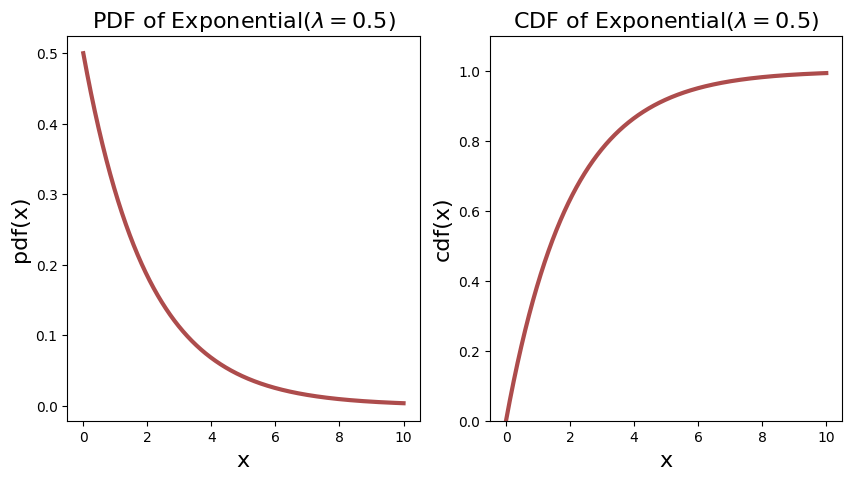

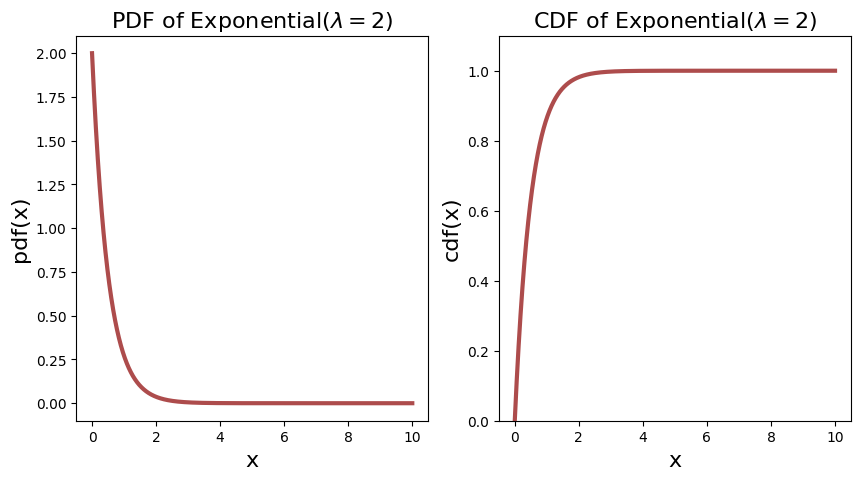

In [2]:
# x = np.linspace(0, 10, 1000)
lambda_1, lambda_2 = 0.5, 2
scale_1, scale_2 = 1 / lambda_1, 1 / lambda_2
X1 = stats.expon(scale=scale_1)
X2 = stats.expon(scale=scale_2)

plot_continuous_pdf_and_cdf(X1, 0, 10, title="Exponential$(\lambda = 0.5)$")
plot_continuous_pdf_and_cdf(X2, 0, 10, title="Exponential$(\lambda = 2)$")

Notice immediately that for the $\lambda_2 = 2$, the PDF starts off at $2$. This
already tells you that PDF is not probability, as it is more than $1$.

One might wonder why you cannot define the probability of a continuous random
variable as the sum like their discrete counterparts. Like, if the domain/sample
space is from $[0, 10]$, why don't we just sum up the probability of all the
points in the domain?

The simple answer is that the domain is infinite, and therefore the sum is
infinite. Henceforth, in continuous distribution, the probability at a point is
defined to be $0$.

### Probability at a Point is Zero

Let's give an informal proof.

Assume that the probability at a point $x_i$ is given by
$\P \lsq X = x_i \rsq = p_i(x)$, then the probability of the entire domain is
given by $\sum_{i=1}^n p_i(x) = \infty$, a contradiction because by the
Probability Axiom {prf:ref}`axiom:normalization`. is $1$.

This does not help build up intuition, because if we use the "summing" idea to
approach the problem, we will be stuck because one cannot convince oneself that
the sum is infinite, and not $1$.

The misconception is that we need to use the idea of "summing" in terms of
integration.

### Probability at a Point in a Small Neighborhood

As
[Aerin Kim](https://towardsdatascience.com/pdf-is-not-a-probability-5a4b8a5d9531)
intuitively pointed out, the probability of a point is not $0$, but rather $0$
in the limit.

So, if we take a small enough neighborhood around $x$, say the interval
$[x, x+\Delta x]$, or equivalently, $[x, x + dx]$ or $[x, x + \delta]$, then the
probability of the point $x$ can be approximated by the area under the curve in
that interval.

Therefore, if $\Delta x$ is small enough, then we can approximately say that
$\P \lsq X = x \rsq$ is the area under the curve between $x$ and $x + \Delta x$.

She further mentioned that the probability density at a point $x$ signifies how
dense the probability is around $x$ in the small neighborhood.

```{admonition} Warning
:class: warning

In this section, we are talking about the probability density at a point, and try to
interpret it as the area under the curve in a small neighborhood. We have not formalized
the idea with integration, which we will do so in the next section.
```

### Example Walkthrough

This example below is modified from a problem set in Singapore's Junior College
notes.

The masses of 200 six-month-old babies are collected. To visualise the
distribution of the mass of a six-month old baby (which is a continuous random
variable), let us for a moment treat this 200 data points as the probability
distribution[^empirical] of all the babies' masses.

Then, we can say that $X$ is a random variable that represents the mass of a
(randomly drawn) baby.

[^empirical]:
    Even though this is the empirical distribution (observed, collected data)
    from the true population (PDF), we will assume that these 200 data points is
    our true population since I am trying to understand PDF.

We can then group the data into 5 classes with a class width of 1 kg each. The
frequency table and the histogram corresponding to the data
{ref}`baby_frequency_1` are shown below.

```{list-table} Baby Mass Frequency Table
:header-rows: 1
:name: baby_frequency_1

* - $x$, Mass (kg)
  - $5 \leq x < 6$
  - $6 \leq x < 7$
  - $7 \leq x < 8$
  - $8 \leq x < 9$
  - $9 \leq x \leq 10$
* - Frequency, $f$
  - 20
  - 48
  - 80
  - 36
  - 16
```

In [3]:
# generated bins of data from 5-10
bin_56 = np.random.uniform(5, 6, 20)
bin_67 = np.random.uniform(6, 7, 48)
bin_78 = np.random.uniform(7, 8, 80)
bin_89 = np.random.uniform(8, 9, 36)
bin_910 = np.random.uniform(9, 10, 16)
population = np.concatenate((bin_56, bin_67, bin_78, bin_89, bin_910))

If we plot out their histograms with bin size of 1, from 5-10 inclusive, we
recover the following histogram.

In the frequency histogram on the left, we can say that,

-   20 babies with mass between 5 and 6;
-   48 babies with mass between 6 and 7;
-   80 babies with mass between 7 and 8;
-   36 babies with mass between 8 and 9;
-   16 babies with mass between 9 and 10.

In the relative frequency in the middle, we can say that,

-   $\frac{20}{200} = 0.1$ babies with mass between 5 and 6;
-   $\frac{48}{200} = 0.24$ babies with mass between 6 and 7;
-   $\frac{80}{200} = 0.4$ babies with mass between 7 and 8;
-   $\frac{36}{200} = 0.18$ babies with mass between 8 and 9;
-   $\frac{16}{200} = 0.08$ babies with mass between 9 and 10.

In the density histogram on the right, we first define the density histogram so
that the area of each rectangle in the histogram is equal to the relative
frequency. In other words, the width $w$ (interval) of each bin multiply by the
height $h$ (density) gives the area of the rectangle, and consequently the
relative frequency of the bin. So to recover the density value $h$, we divide
the relative frequency by the width $w$.

-   $\frac{20}{200} / 1 = 0.1$ babies with mass between 5 and 6;
-   $\frac{48}{200} / 1 = 0.24$ babies with mass between 6 and 7;
-   $\frac{80}{200} / 1 = 0.4$ babies with mass between 7 and 8;
-   $\frac{36}{200} / 1 = 0.18$ babies with mass between 8 and 9;
-   $\frac{16}{200} / 1 = 0.08$ babies with mass between 9 and 10.

In this case the density histogram is the same as the relative frequency
histogram, which is not the case in general (we will see later).

In [4]:
def plot_histogram(population: np.ndarray, bins: int, show_labels: bool = True, save: bool = False) -> None:
    """Plots histogram of population data for baby mass in kg."""
    fig, axes = plt.subplots(1, 3, figsize=(30, 6))

    values, bins, bars = axes[0].hist(
        population,
        density=False,
        bins=bins,
        color="#0504AA",
        alpha=0.5,
        edgecolor="black",
        linewidth=1,
    )

    axes[0].bar_label(bars, fontsize=10, color="navy")
    axes[0].set_xlabel("Mass (kg)")
    axes[0].set_ylabel("Frequencies")
    axes[0].set_title("Frequencies of Baby Mass.")

    values, bins, bars = axes[1].hist(
        population,
        density=False,
        bins=bins,
        color="#0504AA",
        alpha=0.5,
        edgecolor="black",
        linewidth=1,
        weights=np.ones_like(population)
        / len(population),  # this allows matplotlib to show as relative frequency
    )

    axes[1].bar_label(bars, fontsize=10, color="navy")
    axes[1].set_xlabel("Mass (kg)")
    axes[1].set_ylabel("Relative Frequencies")
    axes[1].set_title("Relative Frequencies of Baby Mass.")

    values, bins, bars = axes[2].hist(
        population,
        density=True,
        bins=bins,
        color="#0504AA",
        alpha=0.5,
        edgecolor="black",
        linewidth=1,
    )

    axes[2].bar_label(bars, fontsize=10, color="navy")
    axes[2].set_xlabel("Mass (kg)")
    axes[2].set_ylabel("Density")
    axes[2].set_title("Density Histogram of Baby Mass.")

    if save:
        fig.savefig('plot.png', dpi=300)

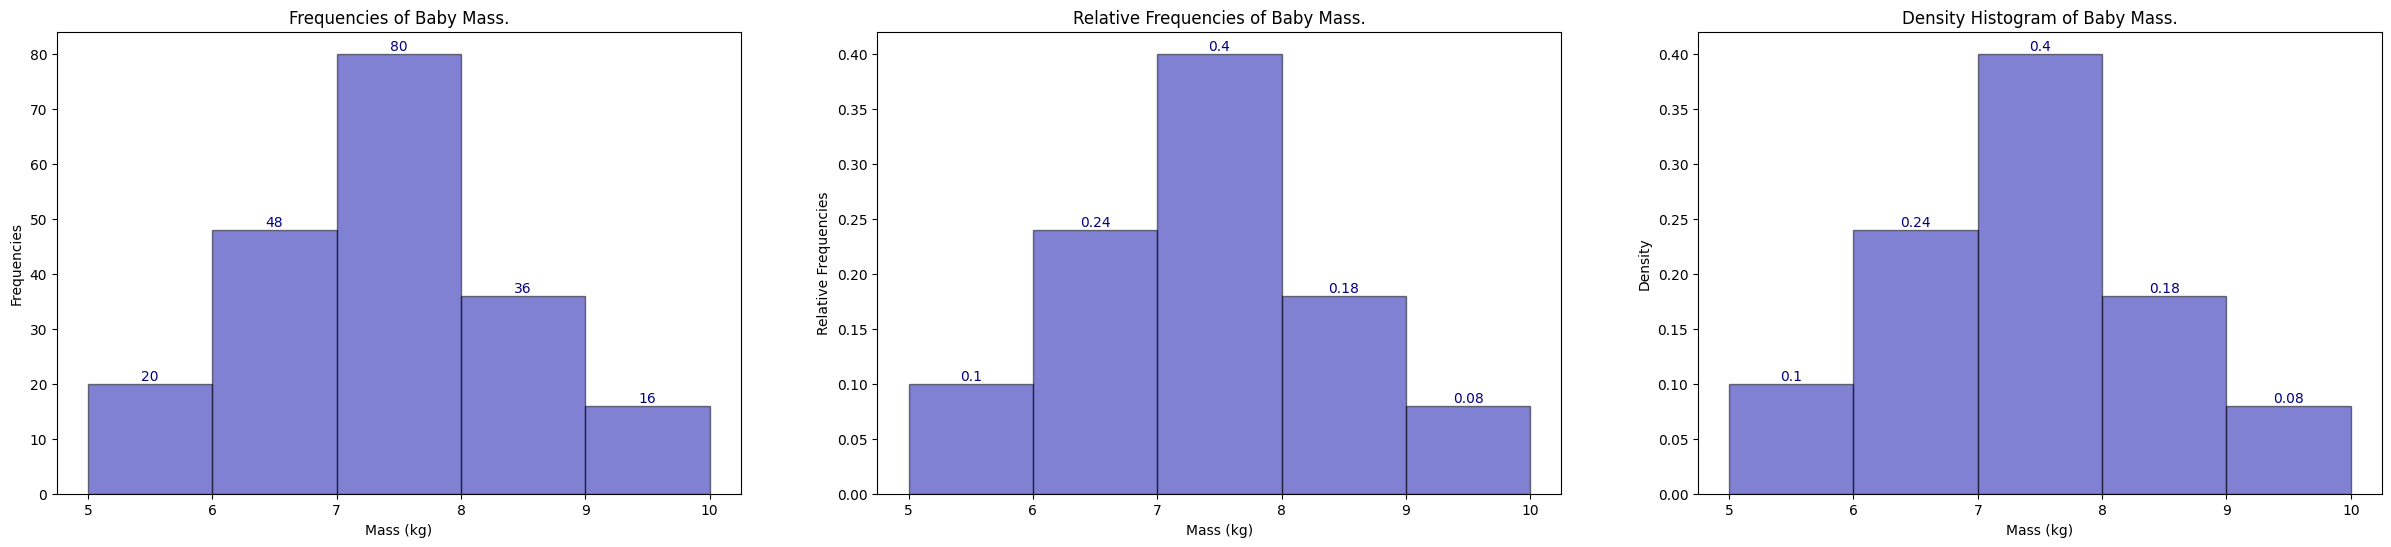

In [5]:
bin_interval = 1
bin_start = 5
bin_end = 10 + bin_interval

bins = np.arange(bin_start, bin_end, bin_interval)
plot_histogram(population, bins, save=False)

We try to link back how a density histogram can connect to PDF and its integral.
Let $X$ be the continuous random variable defined earlier.

1. The area under a density histogram is 1, this follows because the relative
   histogram must add to 1.
2. The area represents how dense the population is at that particular
   interval/bin. The larger the area, the denser the population is (think
   density).
3. For each interval/bin, the area inside that rectangle is simply the relative
   frequency (i.e. $\text{width of interval} \times \text{density}$).
4. Therefore, we can think of it this way, the area inside each interval/bin is
   the probability of $X$ being in that interval.
5. Consequently, we can define $\mathbb{P} [a < X \leq b]$ to be the area inside
   the interval between point a and b, i.e.
   $\mathbb{P} [a < X \leq b] = (b-a) \times \text{density}$

Note we defined this without the usage of integrals.

Now this definition seems quite coarse because we are only restricted with a
fixed interval, i.e. bins 5-10 with only 1 width, and we can only find cases for
these discretized bins.

What if we want to find $\mathbb{P}[5 < X < 5.25]$? Well, we can discretize our
bins further to have 0.25 intervals (width)!

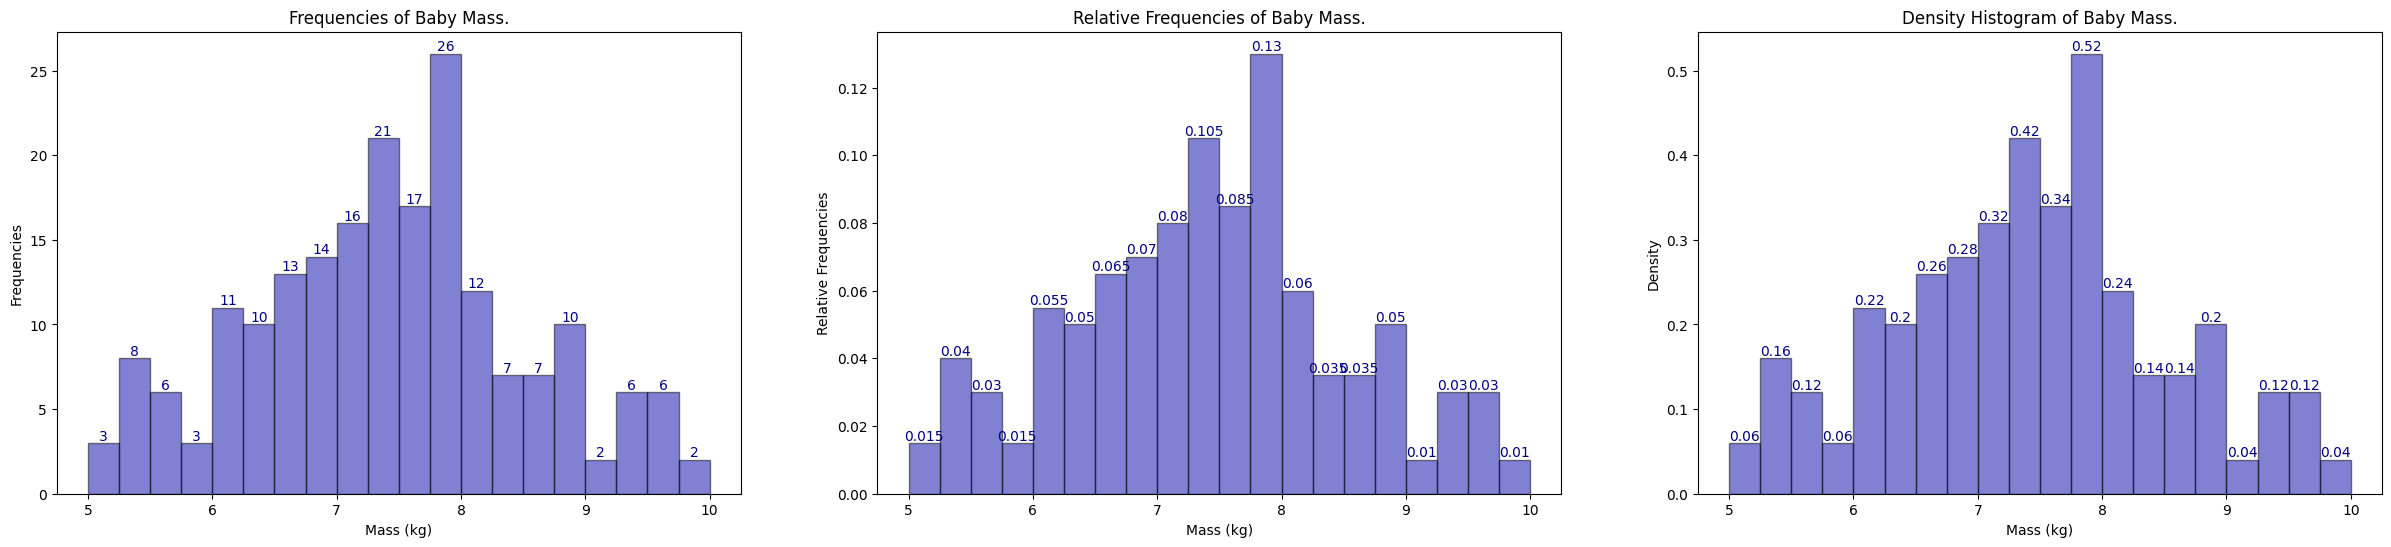

In [6]:
bin_interval = 0.25
bin_start = 5
bin_end = 10 + bin_interval

bins = np.arange(bin_start, bin_end, bin_interval)
plot_histogram(population, bins, save=False)

Before we move on, we take note that in the relative frequency diagram, the
y-labels must sum to 1, but this will not be true here in the density diagram.
Recall relative frequency is density multiplied by bin width (i.e. in the bin 5
to 5.25, we have $0.06 \times 0.25 = 0.015$.

Now the problem is that all the bins are discretized, and hence does not fit the
definition of continuous, we can keep ask for a smaller interval on the real
line (i.e. what is $\mathbb{P}[5.00000001 < X \leq 5.00000002]$). Then we have
to keep shrink the bin width to recover the area of the rectangle in order to
recover the relative frequency (probability).

Define the number of bins to be $k$, and the width of a bin to be $\frac{5}{k}$
where $5$ is $10 - 5$, then we can solve this problem by letting $k \to \infty$,
this will eventually smooth out the whole histogram into infinitely number of
bins and recover a smooth function $f$, which turns out to be our PDF.

We can simply use `seaborn` to plot both a histogram and kde (with its
distribution smoothed).

<Axes: ylabel='Count'>

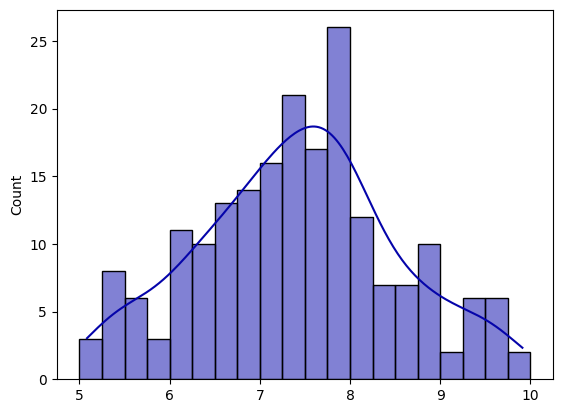

In [7]:
# for the same 20 bins
bin_interval = 0.25
bin_start = 5
bin_end = 10 + bin_interval

bins = np.arange(bin_start, bin_end, bin_interval)  # 20 bins

sns.histplot(
    population, kde=True, bins=bins, color="#0504AA", alpha=0.5, edgecolor="black"
)
# plt.savefig("sns_plot.png", dpi=300)

We now ask, what exactly does PDF mean at a point $x$ mean, in other words, if
$f_X(x)$ is not the probability, then what is it? We established that the
probability at a point $x$ is $0$, because integrating over a point (line) gives
0 (also can prove by contradiction by summing up infinite number of bins).

But to me it does not make sense if this number has no meaning. The textbook
says that $f_X$ at a point $x$ is the "probability mass per unit
length[^unit_length] around $x$ within a small neighbourhood $\delta$".

This means that if we define an infinitesimally small interva epsilon $\delta$
around $x$ (here we would just use $x^{+}$) to $x$, we have an interval
$(x, x+\delta]$. We then ask ourselves the probability between this interval,
which is $\mathbb{P}[x < X \leq x + \delta]$.

Now recall we have showed earlier that we can approximately interpret
integration as sums, and this is now connected to the histograms we plotted. If
the interval/bin width is very small, then we can say that the probability of
this interval is $\mathbb{P}[x < X \leq x + \delta] \approx \delta f_X(x)$. Note
carefully that the interval must be small, if not the "area" won't be close to
the probability as seen in {numref}`mit1805_integration_modified`.

Rearranging will get me:

$$
\mathbb{P}[x < X \leq x + \delta] \approx \delta f_X(x) \implies f_X(x) \approx \dfrac{\mathbb{P}[x < X \leq x + \delta]}{\delta}
$$

Then we can see that the PDF at a point $x$ is the **probability** per
**delta**, which translates to the probability mass per unit length around $x$
within the small neighbourhood $\delta$. One can think of it as how densely
packed $f_X$ is around the point $x$, if $f_X(x)$ turns out to be larger than
the rest, this means that the probability of occurring at that point (and its
neighbourhood) is larger than the rest. More concretely, for the same interval
length $\delta$, a larger $f_X$ means the probability is higher.

Furthermore, the probability density function can be greater than 1, as long as
it obeys that the area under the curve is 1.

Note that the above did not mention about the definition of $f_X$ in terms of
integrals, we complete the intuiton as follows:

$$
\mathbb{P}(x \le X \le x+\delta) = \int_x^{x+\delta} f_X(x) \, dx \approx \delta f_X(x) \approx dx f_X(x)
$$

[^unit_length]: This means per 1 unit.

```{figure} ../assets/mit1805_integration_modified.png
---
name: mit1805_integration_modified
---
Notice that in the last interval, the interval is too large and therefore the approximation is not good. The one
shaded with red is the actual area under the curve between the interval $[x_{n-1}, x_{n}$ where as the
rectangle area (includes the green line) will over approximate.
```

## References and Further Readings

-   Chan, Stanley H. "Chapter 4.1. Probability Density Function." In
    Introduction to Probability for Data Science, 172-180. Ann Arbor, Michigan:
    Michigan Publishing Services, 2021.
-   Pishro-Nik, Hossein. "Chapter 4.1.1. Probability Density Function (PDF)" In
    Introduction to Probability, Statistics, and Random Processes, 226-230.
    Kappa Research, 2014.
-   [Intuition of PDF](https://mathinsight.org/probability_density_function_idea)
-   [Stanford CS70](https://stanford.edu/~dntse/classes/cs70_fall09/note18_fall09.pdf)
-   [PSU STAT 414](https://online.stat.psu.edu/stat414/lesson/14/14.1)
-   [CMU Stats Lecture](https://www.stat.cmu.edu/~cshalizi/36-220/lecture-7.pdf)
-   [MIT 18.05 Continuous Random Variables](https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2014/1f88c7c765d2532fd57d8ee719a751b3_MIT18_05S14_Reading5b.pdf)
-   [Aerin Kim's Article](https://towardsdatascience.com/pdf-is-not-a-probability-5a4b8a5d9531)
-   [Is my interpretation of Probability Density Function correct?](https://stats.stackexchange.com/questions/594743/is-my-interpretation-of-probability-density-function-correct)
-   [Would it be accurate to describe a PDF as a probability mass per unit length?](https://math.stackexchange.com/questions/4325018/would-it-be-accurate-to-describe-a-pdf-as-a-probability-mass-per-unit-length)
-   [Can a probability distribution value exceeding 1 be OK?](https://stats.stackexchange.com/questions/4220/can-a-probability-distribution-value-exceeding-1-be-ok)
-   ["The total area underneath a probability density function is 1" - relative to what?](https://stats.stackexchange.com/questions/133369/the-total-area-underneath-a-probability-density-function-is-1-relative-to-wh)